# Principal Component Analysis(PCA)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

In [6]:
##!pip install sklearn
# Loading inbuild data-set from Sklearn
from sklearn.datasets import load_breast_cancer

In [7]:
cancer = load_breast_cancer()
# Saving data to cancer make variable dictionary. 

In [8]:
cancer.keys()    #Printing dict key

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

'feature_names' are the colum names/ attributes

In [10]:
print(cancer['DESCR']) #printing describtion of the data-set

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [11]:
df=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [12]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Data is on high scale, so we need to do Standard Normalization!, 
Standard Scalar (in sklearn) change data points to Standard Normal Distribution such that mean=0 and S.D=1.
We are just rescaling the all column values into same unit.
by subtracting the mean from the value and divide it form the S.D

In [14]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler= StandardScaler()   #Initialize
scaler.fit(df)            # fitting

StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
scale_data = scaler.transform(df)      #all the values are rescale to the same unit

    PCA with sklearn uses same preprocessing arguments; We initiate PCA, find PCs using fit method, then apply the rotation and dimentionality reduc using transform()
We can also set the no of components when creating PCA object.

In [25]:
from sklearn.decomposition import PCA

In [49]:
pca =PCA(n_components=2)     #converting 30 features into 2 

In [50]:
pca.fit(scale_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [51]:
x_pca = pca.transform(scale_data)

In [52]:
scale_data.shape

(569, 30)

In [53]:
x_pca.shape   #Transform 30 dim to 2 dimentions

(569, 2)

Text(0, 0.5, 'Send feat')

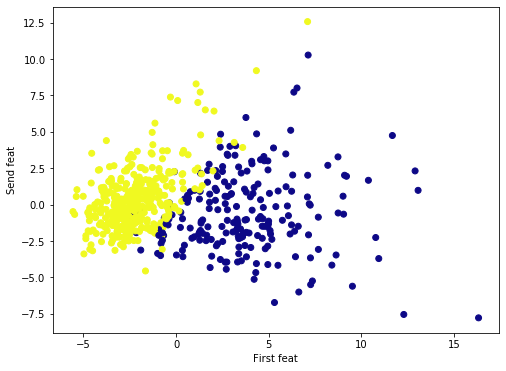

In [55]:
#Plotting the 2 variables....
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First feat')
plt.ylabel('Send feat')


In [56]:
scale_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [58]:
x_pca #Apply x_pca to any ML Algo with y=target for predection

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])